In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv(r"C:\Mba notes\novels\HR_employee_retention.csv")

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.shape

(14999, 10)

In [6]:
data["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [7]:
a=data[data["Work_accident"]==0].left
b=data[data["Work_accident"]==1].left

(array([[9428.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3402.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          169.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

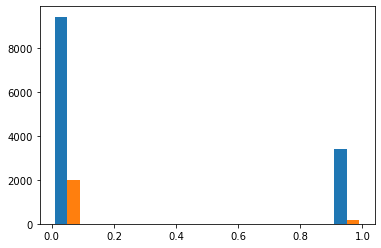

In [8]:
plt.hist([a,b])


In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<BarContainer object of 14999 artists>

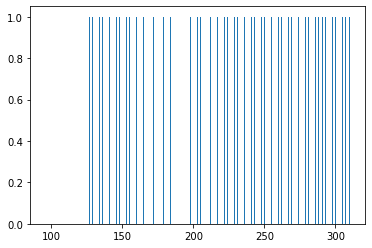

In [14]:
plt.bar(data["average_montly_hours"],data["left"],width=0.2)

In [35]:
print(len(data[data["average_montly_hours"]<150]))

2945


In [37]:
print(len(data[data["average_montly_hours"]<100]))

54


In [32]:
a=data[data["left"]==0].average_montly_hours
b=data[data["left"]==1].average_montly_hours

(array([[1047., 3387., 3177., 3092.,  725.],
        [ 560., 1068.,  163., 1054.,  726.]]),
 array([ 96. , 138.8, 181.6, 224.4, 267.2, 310. ]),
 <a list of 2 Lists of Patches objects>)

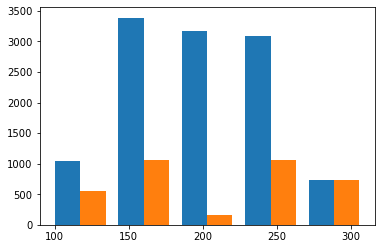

In [16]:
plt.hist([a,b],bins=5,rwidth=0.8)

In [42]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [44]:
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [60]:
data["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
df1=pd.get_dummies(data["sales"])
data["salary"]=LabelEncoder().fit_transform(data["salary"])
df2=pd.concat([df1,data],axis=1)
df3=df2.drop("sales",axis=1)
df3

,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0,0,0,0,0,0,0,0,0,0.38,0.53,2,157,3,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0.80,0.86,5,262,6,0,1,0,2
2,0,0,0,0,0,0,0,0,0,0.11,0.88,7,272,4,0,1,0,2
3,0,0,0,0,0,0,0,0,0,0.72,0.87,5,223,5,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0.37,0.52,2,159,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0,0.40,0.57,2,151,3,0,1,0,1
14995,0,0,0,0,0,0,0,1,0,0.37,0.48,2,160,3,0,1,0,1
14996,0,0,0,0,0,0,0,1,0,0.37,0.53,2,143,3,0,1,0,1
14997,0,0,0,0,0,0,0,1,0,0.11,0.96,6,280,4,0,1,0,1


In [61]:
x=df3.drop("left",axis=1)
y=df3["left"]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
x_train.shape

(11999, 17)

In [66]:
y_train.shape

(11999,)

In [67]:
model=LogisticRegression()

In [69]:
model.fit(x_train,y_train)

C:\Mba notes\novels\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
model.score(x_test,y_test)

0.769

In [71]:
prediction=model.predict(x_test)

In [77]:
cross_val_score(RandomForestClassifier(),x_train,y_train)

array([0.98916667, 0.98541667, 0.99083333, 0.98958333, 0.99374739])

In [78]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train)

array([0.975     , 0.97833333, 0.98      , 0.97083333, 0.97999166])

In [81]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.993

In [82]:
model.score(x_train,y_train)

1.0

No overfitting

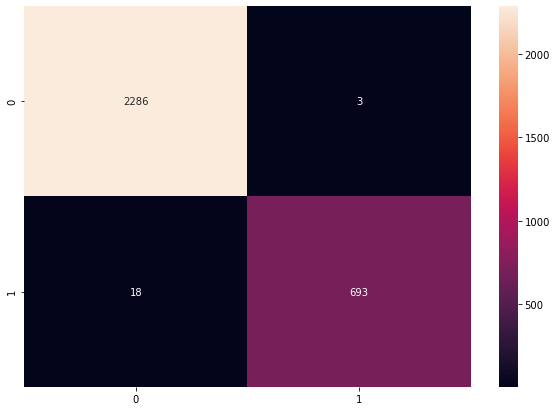

In [90]:
prediction=model.predict(x_test)
cm=confusion_matrix(y_test,prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")

In [95]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2289
           1       1.00      0.97      0.99       711

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

